In [87]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [ ]:
data = pd.read_csv(r'C:\Users\HUA\Desktop\数据分析\数据和项目\Customer Churn\churn.csv')

In [5]:
data.head()

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
State             3333 non-null object
Account Length    3333 non-null int64
Area Code         3333 non-null int64
Phone             3333 non-null object
Int'l Plan        3333 non-null object
VMail Plan        3333 non-null object
VMail Message     3333 non-null int64
Day Mins          3333 non-null float64
Day Calls         3333 non-null int64
Day Charge        3333 non-null float64
Eve Mins          3333 non-null float64
Eve Calls         3333 non-null int64
Eve Charge        3333 non-null float64
Night Mins        3333 non-null float64
Night Calls       3333 non-null int64
Night Charge      3333 non-null float64
Intl Mins         3333 non-null float64
Intl Calls        3333 non-null int64
Intl Charge       3333 non-null float64
CustServ Calls    3333 non-null int64
Churn?            3333 non-null object
dtypes: float64(8), int64(8), object(5)
memory usage: 546.9+ KB


In [11]:
data.columns

Index(['State', 'Account Length', 'Area Code', 'Phone', 'Int'l Plan',
       'VMail Plan', 'VMail Message', 'Day Mins', 'Day Calls', 'Day Charge',
       'Eve Mins', 'Eve Calls', 'Eve Charge', 'Night Mins', 'Night Calls',
       'Night Charge', 'Intl Mins', 'Intl Calls', 'Intl Charge',
       'CustServ Calls', 'Churn?'],
      dtype='object')

Columns needed to be removed for analysis. *State, Account Length, Area Code, Phone*.

In [37]:
data_clean = data.iloc[:,4:]

In [45]:
data_clean.columns = ['Int_plan']+[i for i in data_clean.columns[1:-1]]+['Churn']

In [46]:
data_clean.columns

Index(['Int_plan', 'VMail Plan', 'VMail Message', 'Day Mins', 'Day Calls',
       'Day Charge', 'Eve Mins', 'Eve Calls', 'Eve Charge', 'Night Mins',
       'Night Calls', 'Night Charge', 'Intl Mins', 'Intl Calls', 'Intl Charge',
       'CustServ Calls', 'Churn'],
      dtype='object')

## 数据之间的关系

### Taking a look at the churning ratio

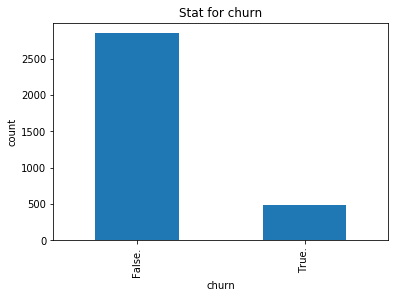

In [127]:
data_clean['Churn'].value_counts().plot(kind='bar');
plt.title('Stat for churn');
plt.xlabel('churn');
plt.ylabel('count');

In [124]:
data_clean['Churn'].value_counts()

False.    2850
True.      483
Name: Churn, dtype: int64

In [85]:
Int_vs_churn = data_clean.groupby(by=['Int_plan','Churn']).size()
Int_vs_churn = Int_vs_churn.reset_index(name='count')
Int_vs_churn = Int_vs_churn.pivot(index='Int_plan',columns='Churn',values='count')

Int_vs_churn

Churn,False.,True.
Int_plan,,
no,2664,346
yes,186,137


In [106]:
int1_churn1 = int(Int_vs_churn[Int_vs_churn.index=='yes']['True.'])
int1_churn0 = int(Int_vs_churn[Int_vs_churn.index=='yes']['False.'])
int0_churn1 = int(Int_vs_churn[Int_vs_churn.index=='no']['True.'])
int0_churn0 = int(Int_vs_churn[Int_vs_churn.index=='no']['False.'])

In [105]:
int(int1_churn0)

186

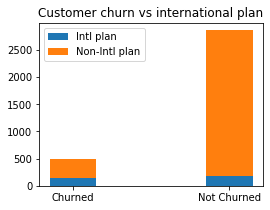

In [115]:
plt.figure(figsize=(4,3))

ind = ['Churned','Not Churned']
d = [[int1_churn1, int1_churn0],
       [int0_churn1, int0_churn0]]
width = 0.3

plt.bar(ind, d[0], width, label='Intl plan');
plt.bar(ind, d[1], width, bottom=d[0], label='Non-Intl plan');
plt.legend();
plt.title('Customer churn vs international plan');

The blue part, customers with international plans has similar number for both stay and leave. The orange part, non-international category, has a much lower rate of leaving.